Lien Github vers le tutortiel : https://github.com/GitiHubi/deepAI

In [1]:
# importing utilities
import os
import sys
from datetime import datetime
import io
import urllib

# importing data science libraries
import pandas as pd
import random as rd
import numpy as np

# importing pytorch libraries
import torch
from torch import nn
from torch import autograd
from torch.utils.data import DataLoader

# import visualization libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from IPython.display import Image, display
sns.set_style('darkgrid')

# ignore potential warnings
import warnings
warnings.filterwarnings("ignore")

# Nettoyage des données

In [2]:
USE_CUDA = False
# initialisé le noyeau
seed_value = 1234 
rd.seed(seed_value) 
np.random.seed(seed_value)
torch.manual_seed(seed_value) # set pytorch seed CPU
if (torch.backends.cudnn.version() != None and USE_CUDA == True):
    torch.cuda.manual_seed(seed_value) # set pytorch seed GPU

In [3]:
# Obtenir le dataset
#url = 'https://raw.githubusercontent.com/GitiHubi/deepAI/master/data/fraud_dataset_v2.csv'
#url = 'https://github.com/Dominicduf/Projet_INF8225/Ecriture.csv'

JE_dataset = pd.read_csv('Ecriture_01.csv', sep=';', decimal=",")

In [4]:
# Visualiser la dimenstion du dataset
col_num = JE_dataset.shape[1]
row_num = JE_dataset.shape[0]

print ("Nombre de lignes : " + str(row_num))
print ("Nombre de colonnes : " + str(col_num))

Nombre de lignes : 165146
Nombre de colonnes : 9


In [5]:
# Retirer les labels
#label = ori_dataset.pop('label')

# Visualisation de la base de donnees
JE_dataset.head(10)

,BKPF_BELNR,BKPF_BUKRS,BKPF_BUZEI,BKPF_BLART,BKPF_USNAM,BKPF_WAERS,BSEG_DMBTR,BSEG_WRBTR,BSEG_HKONT
0,100000001,101,1,SA,DP85180,CAD,2.690000e+08,2.690000e+08,311000
1,100000002,101,1,SA,DP85180,CAD,2.930000e+06,2.930000e+06,399999
2,100000004,101,1,AB,DP85180,CAD,2.930000e+06,2.930000e+06,399999
3,100000009,101,1,SA,AL85560,CAD,9.329210e+03,9.329210e+03,200201
4,100000010,101,1,AB,BC86312,USD,8.660800e+02,0.000000e+00,765010
5,100000013,101,1,SA,DP85180,CAD,4.725507e+07,4.725507e+07,182540
6,100000014,101,1,SA,DP85180,CAD,1.371250e+07,1.371250e+07,471000
7,100000015,101,1,SA,DP85180,CAD,2.800000e+07,2.800000e+07,128201
8,100000016,101,1,SA,DP85180,CAD,8.590910e+06,8.590910e+06,760065
9,100000017,101,1,SA,DP85180,CAD,1.357722e+07,1.357722e+07,762000


In [6]:
# Convertir le colonne BSEG_HKONT en string puisqu'elle est catégorique (numéro de compte)
JE_dataset = JE_dataset.astype({'BSEG_HKONT':str,'BKPF_BUKRS':str})


# Sélection des attributs catégoriques
# BELNR est un identifiant unique pour chaque écriture de journal
categorical_attr_names = ['BKPF_BLART', 'BKPF_USNAM', 'BKPF_WAERS', 'BSEG_HKONT','BKPF_BUKRS']

# one-hot encoding sur les variables catégoriques
JE_dataset_categ_transformed = pd.get_dummies(JE_dataset[categorical_attr_names])

JE_dataset_categ_transformed.head(10)

,BKPF_BLART_AA,BKPF_BLART_AB,BKPF_BLART_AF,BKPF_BLART_DA,BKPF_BLART_DG,BKPF_BLART_DR,BKPF_BLART_DZ,BKPF_BLART_KA,BKPF_BLART_KG,BKPF_BLART_KR,...,BKPF_BUKRS_804,BKPF_BUKRS_901,BKPF_BUKRS_903,BKPF_BUKRS_905,BKPF_BUKRS_907,BKPF_BUKRS_910,BKPF_BUKRS_911,BKPF_BUKRS_912,BKPF_BUKRS_915,BKPF_BUKRS_916
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# sélection des attributs numériques
numeric_attr_names = ['BSEG_DMBTR', 'BSEG_WRBTR']

# élimination du zéro et applicaiton du l'échelle logarithmique
numeric_attr = JE_dataset[numeric_attr_names] + 1e-7
numeric_attr = numeric_attr.apply(np.log)

# normalisation entre 0 et 1
JE_dataset_numeric_attr = (numeric_attr - numeric_attr.min()) / (numeric_attr.max() - numeric_attr.min())

In [8]:
# mettre ensemble les attributs catégoriques et numériques
JE_subset_transformed = pd.concat([JE_dataset_categ_transformed, JE_dataset_numeric_attr], axis = 1)

# Visualisation des dimensions de la base de données complète
JE_subset_transformed.shape

(165146, 1025)

# Autoencodeur

## Initialisation du réseau

### Encoder - Decoder 1 : 1007 - 3 - 1007

In [12]:
# Encodeur 1 
class encoder(nn.Module):

    def __init__(self):

        super(encoder, self).__init__()

        # Couche 1 - in 1007, out 3
        self.encoder_L1 = nn.Linear(in_features=JE_subset_transformed.shape[1], out_features=3, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.encoder_L1.weight) # init weights according to [9]
        self.encoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]

    def forward(self, x):

        # define forward pass through the network
        x = self.encoder_R1(self.encoder_L1(x))
        return x

In [13]:
# Décodeur 1
class decoder(nn.Module):

    def __init__(self):

        super(decoder, self).__init__()

        # Couche 1 - in 3, out 1007
        self.decoder_L1 = nn.Linear(in_features=3, out_features=1025, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L1.weight)  # init weights according to [9]
        self.decoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        

    def forward(self, x):

        # define forward pass through the network
        x = self.decoder_R1(self.decoder_L1(x))
        
        return x

### Encodeur - Decodeur 2 : 1007- 4 - 3 - 4 - 1007

In [22]:
# Encodeur 2
class encoder(nn.Module):

    def __init__(self):

        super(encoder, self).__init__()

        # Couche 1 - in 1007, out 3
        self.encoder_L1 = nn.Linear(in_features=JE_subset_transformed.shape[1], out_features=4, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.encoder_L1.weight) # init weights according to [9]
        self.encoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]

        # Couche 2 - in 4, out 3
        self.encoder_L2 = nn.Linear(4, 3, bias=True)
        nn.init.xavier_uniform_(self.encoder_L2.weight)
        self.encoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche dropout avec probabilité p
        self.dropout = nn.Dropout(p=0, inplace=True)
        
    def forward(self, x):

        # define forward pass through the network
        x = self.encoder_R1(self.dropout(self.encoder_L1(x)))
        x = self.encoder_R2(self.encoder_L2(x))
        return x

In [23]:
# Décodeur 2
class decoder(nn.Module):

    def __init__(self):

        super(decoder, self).__init__()

        # Couche 1 - in 3, out 4
        self.decoder_L1 = nn.Linear(in_features=3, out_features=4, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L1.weight)  # init weights according to [9]
        self.decoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 2 - in 4, out 1007
        self.decoder_L2 = nn.Linear(in_features=4, out_features=1025, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L2.weight)  # init weights according to [9]
        self.decoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche dropout avec probabilité p
        self.dropout = nn.Dropout(p=0, inplace=True)

    def forward(self, x):

        # define forward pass through the network
        x = self.decoder_R1(self.dropout(self.decoder_L1(x)))
        x = self.decoder_R2(self.decoder_L2(x))
        
        return x

### Encodeur-Decodeur 3 : 1007- 8 - 4 - 3 - 4 - 8 - 1007

In [33]:
# Encodeur 3
class encoder(nn.Module):

    def __init__(self):

        super(encoder, self).__init__()

        # Couche 1 - in 1007, out 8
        self.encoder_L1 = nn.Linear(in_features=JE_subset_transformed.shape[1], out_features=8, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.encoder_L1.weight) # init weights according to [9]
        self.encoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]

        # Couche 2 - in 8, out 4
        self.encoder_L2 = nn.Linear(8, 4, bias=True)
        nn.init.xavier_uniform_(self.encoder_L2.weight)
        self.encoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 3 - in 4, out 3
        self.encoder_L3 = nn.Linear(4, 3, bias=True)
        nn.init.xavier_uniform_(self.encoder_L3.weight)
        self.encoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True)        
        
        # Couche dropout avec probabilité p
        self.dropout = nn.Dropout(p=0, inplace=True)
        
    def forward(self, x):

        # define forward pass through the network
        x = self.encoder_R1(self.dropout(self.encoder_L1(x)))
        x = self.encoder_R2(self.dropout(self.encoder_L2(x)))
        x = self.encoder_R3(self.encoder_L3(x))
        return x

In [34]:
# Décodeur 3
class decoder(nn.Module):

    def __init__(self):

        super(decoder, self).__init__()

        # Couche 1 - in 3, out 4
        self.decoder_L1 = nn.Linear(in_features=3, out_features=4, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L1.weight)  # init weights according to [9]
        self.decoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 2 - in 4, out 8
        self.decoder_L2 = nn.Linear(in_features=4, out_features=8, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L2.weight)  # init weights according to [9]
        self.decoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 3 - in 8, out 1007
        self.decoder_L3 = nn.Linear(in_features=8, out_features=1025, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L3.weight)  # init weights according to [9]
        self.decoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche dropout avec probabilité p
        self.dropout = nn.Dropout(p=0, inplace=True)

    def forward(self, x):

        # define forward pass through the network
        x = self.decoder_R1(self.dropout(self.decoder_L1(x)))
        x = self.decoder_R2(self.dropout(self.decoder_L2(x)))
        x = self.decoder_R3(self.decoder_L3(x))
        
        return x

### Encodeur - Decodeur 4 : 1007- 16 - 8 - 4 - 3 - 4 - 8 - 16 - 1007

In [44]:
# Encodeur 4
class encoder(nn.Module):

    def __init__(self):

        super(encoder, self).__init__()

        # Couche 1 - in 1007, out 16
        self.encoder_L1 = nn.Linear(in_features=JE_subset_transformed.shape[1], out_features=16, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.encoder_L1.weight) # init weights according to [9]
        self.encoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]

        # Couche 2 - in 16, out 8
        self.encoder_L2 = nn.Linear(16, 8, bias=True)
        nn.init.xavier_uniform_(self.encoder_L2.weight)
        self.encoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 3 - in 8, out 4
        self.encoder_L3 = nn.Linear(8, 4, bias=True)
        nn.init.xavier_uniform_(self.encoder_L3.weight)
        self.encoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 4 - in 4, out 3
        self.encoder_L4 = nn.Linear(4, 3, bias=True)
        nn.init.xavier_uniform_(self.encoder_L4.weight)
        self.encoder_R4 = nn.LeakyReLU(negative_slope=0.4, inplace=True)  
        
        # Couche dropout avec probabilité p
        self.dropout = nn.Dropout(p=0, inplace=True)
        
    def forward(self, x):

        # define forward pass through the network
        x = self.encoder_R1(self.dropout(self.encoder_L1(x)))
        x = self.encoder_R2(self.dropout(self.encoder_L2(x)))
        x = self.encoder_R3(self.dropout(self.encoder_L3(x)))
        x = self.encoder_R4(self.encoder_L4(x))
        
        return x

In [45]:
# Décodeur 4
class decoder(nn.Module):

    def __init__(self):

        super(decoder, self).__init__()

        # Couche 1 - in 3, out 4
        self.decoder_L1 = nn.Linear(in_features=3, out_features=4, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L1.weight)  # init weights according to [9]
        self.decoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 2 - in 4, out 8
        self.decoder_L2 = nn.Linear(in_features=4, out_features=8, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L2.weight)  # init weights according to [9]
        self.decoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 3 - in 8, out 16
        self.decoder_L3 = nn.Linear(in_features=8, out_features=16, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L3.weight)  # init weights according to [9]
        self.decoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 4 - in 16, out 1007
        self.decoder_L4 = nn.Linear(in_features=16, out_features=1025, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L4.weight)  # init weights according to [9]
        self.decoder_R4 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche dropout avec probabilité p
        self.dropout = nn.Dropout(p=0, inplace=True)

    def forward(self, x):

        # define forward pass through the network
        x = self.decoder_R1(self.dropout(self.decoder_L1(x)))
        x = self.decoder_R2(self.dropout(self.decoder_L2(x)))
        x = self.decoder_R3(self.dropout(self.decoder_L3(x)))
        x = self.decoder_R4(self.decoder_L4(x))
        
        return x

### Encodeur - Decodeur 5 : 1007- 32 -16 - 8 - 4 - 3 - 4 - 8 - 16 - 32 - 1007

In [55]:
# Encodeur 5
class encoder(nn.Module):

    def __init__(self):

        super(encoder, self).__init__()

        # Couche 1 - in 1007, out 32
        self.encoder_L1 = nn.Linear(in_features=JE_subset_transformed.shape[1], out_features=32, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.encoder_L1.weight) # init weights according to [9]
        self.encoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]

        # Couche 2 - in 32, out 16
        self.encoder_L2 = nn.Linear(32, 16, bias=True)
        nn.init.xavier_uniform_(self.encoder_L2.weight)
        self.encoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 3 - in 16, out 8
        self.encoder_L3 = nn.Linear(16, 8, bias=True)
        nn.init.xavier_uniform_(self.encoder_L3.weight)
        self.encoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 4 - in 8, out 4
        self.encoder_L4 = nn.Linear(8, 4, bias=True)
        nn.init.xavier_uniform_(self.encoder_L4.weight)
        self.encoder_R4 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 5 - in 4, out 3
        self.encoder_L5 = nn.Linear(4, 3, bias=True)
        nn.init.xavier_uniform_(self.encoder_L5.weight)
        self.encoder_R5 = nn.LeakyReLU(negative_slope=0.4, inplace=True)  
        
        # Couche dropout avec probabilité p
        self.dropout = nn.Dropout(p=0, inplace=True)
        
    def forward(self, x):

        # define forward pass through the network
        x = self.encoder_R1(self.dropout(self.encoder_L1(x)))
        x = self.encoder_R2(self.dropout(self.encoder_L2(x)))
        x = self.encoder_R3(self.dropout(self.encoder_L3(x)))
        x = self.encoder_R4(self.dropout(self.encoder_L4(x)))
        x = self.encoder_R5(self.encoder_L5(x))
        
        return x

In [56]:
# Décodeur 5
class decoder(nn.Module):

    def __init__(self):

        super(decoder, self).__init__()

        # Couche 1 - in 3, out 4
        self.decoder_L1 = nn.Linear(in_features=3, out_features=4, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L1.weight)  # init weights according to [9]
        self.decoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 2 - in 4, out 8
        self.decoder_L2 = nn.Linear(in_features=4, out_features=8, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L2.weight)  # init weights according to [9]
        self.decoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 3 - in 8, out 16
        self.decoder_L3 = nn.Linear(in_features=8, out_features=16, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L3.weight)  # init weights according to [9]
        self.decoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 4 - in 16, out 32
        self.decoder_L4 = nn.Linear(in_features=16, out_features=32, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L4.weight)  # init weights according to [9]
        self.decoder_R4 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 5 - in 32, out 1007
        self.decoder_L5 = nn.Linear(in_features=32, out_features=1025, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L5.weight)  # init weights according to [9]
        self.decoder_R5 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche dropout avec probabilité p
        self.dropout = nn.Dropout(p=0, inplace=True)

    def forward(self, x):

        # define forward pass through the network
        x = self.decoder_R1(self.dropout(self.decoder_L1(x)))
        x = self.decoder_R2(self.dropout(self.decoder_L2(x)))
        x = self.decoder_R3(self.dropout(self.decoder_L3(x)))
        x = self.decoder_R4(self.dropout(self.decoder_L4(x)))
        x = self.decoder_R5(self.decoder_L5(x))
        
        return x

###  Encodeur - Decodeur 6 : 1007- 64 - 32 -16 - 8 - 4 - 3 - 4 - 8 - 16 - 32 - 64 - 1007

In [66]:
# Encodeur 6
class encoder(nn.Module):

    def __init__(self):

        super(encoder, self).__init__()

        # Couche 1 - in 1007, out 64
        self.encoder_L1 = nn.Linear(in_features=JE_subset_transformed.shape[1], out_features=64, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.encoder_L1.weight) # init weights according to [9]
        self.encoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]

        # Couche 2 - in 64, out 32
        self.encoder_L2 = nn.Linear(64, 32, bias=True)
        nn.init.xavier_uniform_(self.encoder_L2.weight)
        self.encoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 3 - in 32, out 16
        self.encoder_L3 = nn.Linear(32, 16, bias=True)
        nn.init.xavier_uniform_(self.encoder_L3.weight)
        self.encoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 4 - in 16, out 8
        self.encoder_L4 = nn.Linear(16, 8, bias=True)
        nn.init.xavier_uniform_(self.encoder_L4.weight)
        self.encoder_R4 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 5 - in 8, out 4
        self.encoder_L5 = nn.Linear(8, 4, bias=True)
        nn.init.xavier_uniform_(self.encoder_L5.weight)
        self.encoder_R5 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 6 - in 4, out 3
        self.encoder_L6 = nn.Linear(4, 3, bias=True)
        nn.init.xavier_uniform_(self.encoder_L6.weight)
        self.encoder_R6 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche dropout avec probabilité p
        self.dropout = nn.Dropout(p=0, inplace=True)
        
    def forward(self, x):

        # define forward pass through the network
        x = self.encoder_R1(self.dropout(self.encoder_L1(x)))
        x = self.encoder_R2(self.dropout(self.encoder_L2(x)))
        x = self.encoder_R3(self.dropout(self.encoder_L3(x)))
        x = self.encoder_R4(self.dropout(self.encoder_L4(x)))
        x = self.encoder_R5(self.dropout(self.encoder_L5(x)))
        x = self.encoder_R6(self.encoder_L6(x))
        
        return x

In [67]:
# Décodeur 6
class decoder(nn.Module):

    def __init__(self):

        super(decoder, self).__init__()

        # Couche 1 - in 3, out 4
        self.decoder_L1 = nn.Linear(in_features=3, out_features=4, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L1.weight)  # init weights according to [9]
        self.decoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 2 - in 4, out 8
        self.decoder_L2 = nn.Linear(in_features=4, out_features=8, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L2.weight)  # init weights according to [9]
        self.decoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 3 - in 8, out 16
        self.decoder_L3 = nn.Linear(in_features=8, out_features=16, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L3.weight)  # init weights according to [9]
        self.decoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 4 - in 16, out 32
        self.decoder_L4 = nn.Linear(in_features=16, out_features=32, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L4.weight)  # init weights according to [9]
        self.decoder_R4 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 5 - in 32, out 64
        self.decoder_L5 = nn.Linear(in_features=32, out_features=64, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L5.weight)  # init weights according to [9]
        self.decoder_R5 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 6 - in 64, out 1007
        self.decoder_L6 = nn.Linear(in_features=64, out_features=1025, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L6.weight)  # init weights according to [9]
        self.decoder_R6 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
   
        # Couche dropout avec probabilité p
        self.dropout = nn.Dropout(p=0, inplace=True)

    def forward(self, x):

        # define forward pass through the network
        x = self.decoder_R1(self.dropout(self.decoder_L1(x)))
        x = self.decoder_R2(self.dropout(self.decoder_L2(x)))
        x = self.decoder_R3(self.dropout(self.decoder_L3(x)))
        x = self.decoder_R4(self.dropout(self.decoder_L4(x)))
        x = self.decoder_R5(self.dropout(self.decoder_L5(x)))
        x = self.decoder_R6(self.decoder_L6(x))
        
        return x

### Encodeur - Decodeur 7 : 1007- 128 - 64 - 32 -16 - 8 - 4 - 3 - 4 - 8 - 16 - 32 - 64 - 128 - 1007

In [81]:
# Encodeur 7
class encoder(nn.Module):

    def __init__(self):

        super(encoder, self).__init__()

        # Couche 1 - in 1007, out 128
        self.encoder_L1 = nn.Linear(in_features=JE_subset_transformed.shape[1], out_features=128, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.encoder_L1.weight) # init weights according to [9]
        self.encoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]

        # Couche 2 - in 128, out 64
        self.encoder_L2 = nn.Linear(128, 64, bias=True)
        nn.init.xavier_uniform_(self.encoder_L2.weight)
        self.encoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 3 - in 64, out 32
        self.encoder_L3 = nn.Linear(64, 32, bias=True)
        nn.init.xavier_uniform_(self.encoder_L3.weight)
        self.encoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 4 - in 32, out 16
        self.encoder_L4 = nn.Linear(32, 16, bias=True)
        nn.init.xavier_uniform_(self.encoder_L4.weight)
        self.encoder_R4 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 5 - in 16, out 8
        self.encoder_L5 = nn.Linear(16, 8, bias=True)
        nn.init.xavier_uniform_(self.encoder_L5.weight)
        self.encoder_R5 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 6 - in 8, out 4
        self.encoder_L6 = nn.Linear(8, 4, bias=True)
        nn.init.xavier_uniform_(self.encoder_L6.weight)
        self.encoder_R6 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 7 - in 4, out 3
        self.encoder_L7 = nn.Linear(4, 3, bias=True)
        nn.init.xavier_uniform_(self.encoder_L7.weight)
        self.encoder_R7 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche dropout avec probabilité p
        self.dropout = nn.Dropout(p=0, inplace=True)
        
    def forward(self, x):

        # define forward pass through the network
        x = self.encoder_R1(self.dropout(self.encoder_L1(x)))
        x = self.encoder_R2(self.dropout(self.encoder_L2(x)))
        x = self.encoder_R3(self.dropout(self.encoder_L3(x)))
        x = self.encoder_R4(self.dropout(self.encoder_L4(x)))
        x = self.encoder_R5(self.dropout(self.encoder_L5(x)))
        x = self.encoder_R6(self.dropout(self.encoder_L6(x)))
        x = self.encoder_R7(self.encoder_L7(x))
        
        return x

In [82]:
# Décodeur 7
class decoder(nn.Module):

    def __init__(self):

        super(decoder, self).__init__()

        # Couche 1 - in 3, out 4
        self.decoder_L1 = nn.Linear(in_features=3, out_features=4, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L1.weight)  # init weights according to [9]
        self.decoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 2 - in 4, out 8
        self.decoder_L2 = nn.Linear(in_features=4, out_features=8, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L2.weight)  # init weights according to [9]
        self.decoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 3 - in 8, out 16
        self.decoder_L3 = nn.Linear(in_features=8, out_features=16, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L3.weight)  # init weights according to [9]
        self.decoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 4 - in 16, out 32
        self.decoder_L4 = nn.Linear(in_features=16, out_features=32, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L4.weight)  # init weights according to [9]
        self.decoder_R4 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 5 - in 32, out 64
        self.decoder_L5 = nn.Linear(in_features=32, out_features=64, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L5.weight)  # init weights according to [9]
        self.decoder_R5 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 6 - in 64, out 128
        self.decoder_L6 = nn.Linear(in_features=64, out_features=128, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L6.weight)  # init weights according to [9]
        self.decoder_R6 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 7 - in 128, out 1007
        self.decoder_L7 = nn.Linear(in_features=128, out_features=1025, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L7.weight)  # init weights according to [9]
        self.decoder_R7 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
   
        # Couche dropout avec probabilité p
        self.dropout = nn.Dropout(p=0, inplace=True)

    def forward(self, x):

        # define forward pass through the network
        x = self.decoder_R1(self.dropout(self.decoder_L1(x)))
        x = self.decoder_R2(self.dropout(self.decoder_L2(x)))
        x = self.decoder_R3(self.dropout(self.decoder_L3(x)))
        x = self.decoder_R4(self.dropout(self.decoder_L4(x)))
        x = self.decoder_R5(self.dropout(self.decoder_L5(x)))
        x = self.decoder_R6(self.dropout(self.decoder_L6(x)))
        x = self.decoder_R7(self.decoder_L7(x))
        
        return x

### Encodeur - Decodeur 8 : 1007- 256 - 128 - 64 - 32 -16 - 8 - 4 - 3 - 4 - 8 - 16 - 32 - 64 - 128 - 256 - 1007 

In [100]:
# Encodeur 8
class encoder(nn.Module):

    def __init__(self):

        super(encoder, self).__init__()

        # Couche 1 - in 1007, out 256
        self.encoder_L1 = nn.Linear(in_features=JE_subset_transformed.shape[1], out_features=256, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.encoder_L1.weight) # init weights according to [9]
        self.encoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]

        # Couche 2 - in 256, out 128
        self.encoder_L2 = nn.Linear(256, 128, bias=True)
        nn.init.xavier_uniform_(self.encoder_L2.weight)
        self.encoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 3 - in 128, out 64
        self.encoder_L3 = nn.Linear(128, 64, bias=True)
        nn.init.xavier_uniform_(self.encoder_L3.weight)
        self.encoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 4 - in 64, out 32
        self.encoder_L4 = nn.Linear(64, 32, bias=True)
        nn.init.xavier_uniform_(self.encoder_L4.weight)
        self.encoder_R4 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 5 - in 32, out 16
        self.encoder_L5 = nn.Linear(32, 16, bias=True)
        nn.init.xavier_uniform_(self.encoder_L5.weight)
        self.encoder_R5 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 6 - in 16, out 8
        self.encoder_L6 = nn.Linear(16, 8, bias=True)
        nn.init.xavier_uniform_(self.encoder_L6.weight)
        self.encoder_R6 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 7 - in 8, out 4
        self.encoder_L7 = nn.Linear(8, 4, bias=True)
        nn.init.xavier_uniform_(self.encoder_L7.weight)
        self.encoder_R7 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche 8 - in 4, out 3
        self.encoder_L8 = nn.Linear(4, 3, bias=True)
        nn.init.xavier_uniform_(self.encoder_L8.weight)
        self.encoder_R8 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # Couche dropout avec probabilité p
        self.dropout = nn.Dropout(p=0, inplace=True)
        
    def forward(self, x):

        # define forward pass through the network
        x = self.encoder_R1(self.dropout(self.encoder_L1(x)))
        x = self.encoder_R2(self.dropout(self.encoder_L2(x)))
        x = self.encoder_R3(self.dropout(self.encoder_L3(x)))
        x = self.encoder_R4(self.dropout(self.encoder_L4(x)))
        x = self.encoder_R5(self.dropout(self.encoder_L5(x)))
        x = self.encoder_R6(self.dropout(self.encoder_L6(x)))
        x = self.encoder_R7(self.dropout(self.encoder_L7(x)))
        x = self.encoder_R8(self.encoder_L8(x))
        
        return x

In [101]:
# Décodeur 8
class decoder(nn.Module):

    def __init__(self):

        super(decoder, self).__init__()

        # Couche 1 - in 3, out 4
        self.decoder_L1 = nn.Linear(in_features=3, out_features=4, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L1.weight)  # init weights according to [9]
        self.decoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 2 - in 4, out 8
        self.decoder_L2 = nn.Linear(in_features=4, out_features=8, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L2.weight)  # init weights according to [9]
        self.decoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 3 - in 8, out 16
        self.decoder_L3 = nn.Linear(in_features=8, out_features=16, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L3.weight)  # init weights according to [9]
        self.decoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 4 - in 16, out 32
        self.decoder_L4 = nn.Linear(in_features=16, out_features=32, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L4.weight)  # init weights according to [9]
        self.decoder_R4 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 5 - in 32, out 64
        self.decoder_L5 = nn.Linear(in_features=32, out_features=64, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L5.weight)  # init weights according to [9]
        self.decoder_R5 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 6 - in 64, out 128
        self.decoder_L6 = nn.Linear(in_features=64, out_features=128, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L6.weight)  # init weights according to [9]
        self.decoder_R6 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 7 - in 128, out 256
        self.decoder_L7 = nn.Linear(in_features=128, out_features=256, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L7.weight)  # init weights according to [9]
        self.decoder_R7 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
        # Couche 8 - in 256, out 1007
        self.decoder_L8 = nn.Linear(in_features=256, out_features=1025, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L8.weight)  # init weights according to [9]
        self.decoder_R8 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
   
        # Couche dropout avec probabilité p
        self.dropout = nn.Dropout(p=0, inplace=True)

    def forward(self, x):

        # define forward pass through the network
        x = self.decoder_R1(self.dropout(self.decoder_L1(x)))
        x = self.decoder_R2(self.dropout(self.decoder_L2(x)))
        x = self.decoder_R3(self.dropout(self.decoder_L3(x)))
        x = self.decoder_R4(self.dropout(self.decoder_L4(x)))
        x = self.decoder_R5(self.dropout(self.decoder_L5(x)))
        x = self.decoder_R6(self.dropout(self.decoder_L6(x)))
        x = self.decoder_R7(self.dropout(self.decoder_L7(x)))
        x = self.decoder_R8(self.decoder_L8(x))
        
        return x

### Encodeur - Decodeur 9 : 1007- 512 - 256 - 128 - 64 - 32 -16 - 8 - 4 - 3 - 4 - 8 - 16 - 32 - 64 - 128 - 256 - 512 - 1007

In [111]:
# Encodeur 9
class encoder(nn.Module):

    def __init__(self):

        super(encoder, self).__init__()

        # Couche 1 - in 1007, out 512
        self.encoder_L1 = nn.Linear(in_features=JE_subset_transformed.shape[1], out_features=512, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.encoder_L1.weight) # init weights according to [9]
        self.encoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]

        # Couche 2 - in 512, out 256
        self.encoder_L2 = nn.Linear(512, 256, bias=True)
        nn.init.xavier_uniform_(self.encoder_L2.weight)
        self.encoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # Couche 3 - in 256, out 128
        self.encoder_L3 = nn.Linear(256, 128, bias=True)
        nn.init.xavier_uniform_(self.encoder_L3.weight)
        self.encoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # Couche 4 - in 128, out 64
        self.encoder_L4 = nn.Linear(128, 64, bias=True)
        nn.init.xavier_uniform_(self.encoder_L4.weight)
        self.encoder_R4 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 5 - in 64, out 32
        self.encoder_L5 = nn.Linear(64, 32, bias=True)
        nn.init.xavier_uniform_(self.encoder_L5.weight)
        self.encoder_R5 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 6 - in 32, out 16
        self.encoder_L6 = nn.Linear(32, 16, bias=True)
        nn.init.xavier_uniform_(self.encoder_L6.weight)
        self.encoder_R6 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 7 - in 16, out 8
        self.encoder_L7 = nn.Linear(16, 8, bias=True)
        nn.init.xavier_uniform_(self.encoder_L7.weight)
        self.encoder_R7 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 8 - in 8, out 4
        self.encoder_L8 = nn.Linear(8, 4, bias=True)
        nn.init.xavier_uniform_(self.encoder_L8.weight)
        self.encoder_R8 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 9 - in 4, out 3
        self.encoder_L9 = nn.Linear(4, 3, bias=True)
        nn.init.xavier_uniform_(self.encoder_L9.weight)
        self.encoder_R9 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # init dropout layer with probability p
        self.dropout = nn.Dropout(p=0, inplace=True)
        
    def forward(self, x):

        # define forward pass through the network
        x = self.encoder_R1(self.dropout(self.encoder_L1(x)))
        x = self.encoder_R2(self.dropout(self.encoder_L2(x)))
        x = self.encoder_R3(self.dropout(self.encoder_L3(x)))
        x = self.encoder_R4(self.dropout(self.encoder_L4(x)))
        x = self.encoder_R5(self.dropout(self.encoder_L5(x)))
        x = self.encoder_R6(self.dropout(self.encoder_L6(x)))
        x = self.encoder_R7(self.dropout(self.encoder_L7(x)))
        x = self.encoder_R8(self.dropout(self.encoder_L8(x)))
        x = self.encoder_R9(self.encoder_L9(x)) # don't apply dropout to the AE bottleneck

        return x

In [112]:
# Décodeur 9
class decoder(nn.Module):

    def __init__(self):

        super(decoder, self).__init__()

        # specify layer 1 - in 3, out 4
        self.decoder_L1 = nn.Linear(in_features=3, out_features=4, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L1.weight)  # init weights according to [9]
        self.decoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]

        # specify layer 2 - in 4, out 8
        self.decoder_L2 = nn.Linear(4, 8, bias=True)
        nn.init.xavier_uniform_(self.decoder_L2.weight)
        self.decoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 3 - in 8, out 16
        self.decoder_L3 = nn.Linear(8, 16, bias=True)
        nn.init.xavier_uniform_(self.decoder_L3.weight)
        self.decoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 4 - in 16, out 32
        self.decoder_L4 = nn.Linear(16, 32, bias=True)
        nn.init.xavier_uniform_(self.decoder_L4.weight)
        self.decoder_R4 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 5 - in 32, out 64
        self.decoder_L5 = nn.Linear(32, 64, bias=True)
        nn.init.xavier_uniform_(self.decoder_L5.weight)
        self.decoder_R5 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 6 - in 64, out 128
        self.decoder_L6 = nn.Linear(64, 128, bias=True)
        nn.init.xavier_uniform_(self.decoder_L6.weight)
        self.decoder_R6 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # specify layer 7 - in 128, out 256
        self.decoder_L7 = nn.Linear(128, 256, bias=True)
        nn.init.xavier_uniform_(self.decoder_L7.weight)
        self.decoder_R7 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 8 - in 256, out 512
        self.decoder_L8 = nn.Linear(256, 512, bias=True)
        nn.init.xavier_uniform_(self.decoder_L8.weight)
        self.decoder_R8 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 9 - in 512, out 618
        self.decoder_L9 = nn.Linear(in_features=512, out_features=JE_subset_transformed.shape[1], bias=True)
        nn.init.xavier_uniform_(self.decoder_L9.weight)
        self.decoder_R9 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # init dropout layer with probability p
        self.dropout = nn.Dropout(p=0, inplace=True)

    def forward(self, x):

        # define forward pass through the network
        x = self.decoder_R1(self.dropout(self.decoder_L1(x)))
        x = self.decoder_R2(self.dropout(self.decoder_L2(x)))
        x = self.decoder_R3(self.dropout(self.decoder_L3(x)))
        x = self.decoder_R4(self.dropout(self.decoder_L4(x)))
        x = self.decoder_R5(self.dropout(self.decoder_L5(x)))
        x = self.decoder_R6(self.dropout(self.decoder_L6(x)))
        x = self.decoder_R7(self.dropout(self.decoder_L7(x)))
        x = self.decoder_R8(self.dropout(self.decoder_L8(x)))
        x = self.decoder_R9(self.decoder_L9(x)) # don't apply dropout to the AE output
        
        return x

### Initialisation du réseau

In [113]:
# init training network classes / architectures
encoder_train = encoder()

# push to cuda if cudnn is available
if (torch.backends.cudnn.version() != None and USE_CUDA == True):
    encoder_train = encoder().cuda()
    
print('encoder architecture:\n\n{}\n'.format(encoder_train))

encoder architecture:

encoder(
  (encoder_L1): Linear(in_features=1007, out_features=512, bias=True)
  (encoder_R1): LeakyReLU(negative_slope=0.4, inplace=True)
  (encoder_L2): Linear(in_features=512, out_features=256, bias=True)
  (encoder_R2): LeakyReLU(negative_slope=0.4, inplace=True)
  (encoder_L3): Linear(in_features=256, out_features=128, bias=True)
  (encoder_R3): LeakyReLU(negative_slope=0.4, inplace=True)
  (encoder_L4): Linear(in_features=128, out_features=64, bias=True)
  (encoder_R4): LeakyReLU(negative_slope=0.4, inplace=True)
  (encoder_L5): Linear(in_features=64, out_features=32, bias=True)
  (encoder_R5): LeakyReLU(negative_slope=0.4, inplace=True)
  (encoder_L6): Linear(in_features=32, out_features=16, bias=True)
  (encoder_R6): LeakyReLU(negative_slope=0.4, inplace=True)
  (encoder_L7): Linear(in_features=16, out_features=8, bias=True)
  (encoder_R7): LeakyReLU(negative_slope=0.4, inplace=True)
  (encoder_L8): Linear(in_features=8, out_features=4, bias=True)
  (enco

In [114]:
# initialisation de l'architecture du décodeur
decoder_train = decoder()

# push to cuda if cudnn is available
if (torch.backends.cudnn.version() != None) and (USE_CUDA == True):
    decoder_train = decoder().cuda()
    
# print the initialized architectures
print('decodeur architecture:\n\n{}\n'.format(decoder_train))

decodeur architecture:

decoder(
  (decoder_L1): Linear(in_features=3, out_features=4, bias=True)
  (decoder_R1): LeakyReLU(negative_slope=0.4, inplace=True)
  (decoder_L2): Linear(in_features=4, out_features=8, bias=True)
  (decoder_R2): LeakyReLU(negative_slope=0.4, inplace=True)
  (decoder_L3): Linear(in_features=8, out_features=16, bias=True)
  (decoder_R3): LeakyReLU(negative_slope=0.4, inplace=True)
  (decoder_L4): Linear(in_features=16, out_features=32, bias=True)
  (decoder_R4): LeakyReLU(negative_slope=0.4, inplace=True)
  (decoder_L5): Linear(in_features=32, out_features=64, bias=True)
  (decoder_R5): LeakyReLU(negative_slope=0.4, inplace=True)
  (decoder_L6): Linear(in_features=64, out_features=128, bias=True)
  (decoder_R6): LeakyReLU(negative_slope=0.4, inplace=True)
  (decoder_L7): Linear(in_features=128, out_features=256, bias=True)
  (decoder_R7): LeakyReLU(negative_slope=0.4, inplace=True)
  (decoder_L8): Linear(in_features=256, out_features=512, bias=True)
  (decoder_

## Entraînement du réseau

In [115]:
# fonction de perte
loss_function = nn.BCEWithLogitsLoss(reduction='mean')

# Pas d'entrainement et optimisation
learning_rate = 1e-3
encoder_optimizer = torch.optim.Adam(encoder_train.parameters(), lr=learning_rate)
decoder_optimizer = torch.optim.Adam(decoder_train.parameters(), lr=learning_rate)

In [116]:
# specify training parameters
num_epochs = 10
mini_batch_size = 64

In [117]:
# convert pre-processed data to pytorch tensor
torch_dataset = torch.from_numpy(JE_subset_transformed.values).float()

# convert to pytorch tensor - none cuda enabled
dataloader = DataLoader(torch_dataset, batch_size=mini_batch_size, shuffle=True, num_workers=1)

if (torch.backends.cudnn.version() != None) and (USE_CUDA == True):
    dataloader = DataLoader(torch_dataset.cuda(), batch_size=mini_batch_size, shuffle=True)

In [118]:
# init collection of epoch losses
epoch_losses = []

# convert encoded transactional data to torch Variable
data = autograd.Variable(torch_dataset)

# train autoencoder model
for epoch in range(num_epochs):

    # init collection of epoch losses
    mini_batch_losses = []
    
    # init mini batch counter
    mini_batch_count = 0
    
    # determine if CUDA is available at compute node
    if(torch.backends.cudnn.version() != None) and (USE_CUDA == True):
        
        # set networks / models in GPU mode
        encoder_train.cuda()
        decoder_train.cuda()

    # set networks in training mode (apply dropout when needed)
    encoder_train.train()
    decoder_train.train()

    # start timer
    start_time = datetime.now()
        
    # iterate over all mini-batches
    for mini_batch_data in dataloader:

        # increase mini batch counter
        mini_batch_count += 1

        # convert mini batch to torch variable
        mini_batch_torch = autograd.Variable(mini_batch_data)

        # =================== (1) forward pass ===================================

        # run forward pass
        z_representation = encoder_train(mini_batch_torch) # encode mini-batch data
        mini_batch_reconstruction = decoder_train(z_representation) # decode mini-batch data
        
        # =================== (2) compute reconstruction loss ====================

        # determine reconstruction loss
        reconstruction_loss = loss_function(mini_batch_reconstruction, mini_batch_torch)
        
        # =================== (3) backward pass ==================================

        # reset graph gradients
        decoder_optimizer.zero_grad()
        encoder_optimizer.zero_grad()

        # run backward pass
        reconstruction_loss.backward()
        
        # =================== (4) update model parameters ========================

        # update network parameters
        decoder_optimizer.step()
        encoder_optimizer.step()

        # =================== monitor training progress ==========================

        # print training progress each 1'000 mini-batches
        if mini_batch_count % 1000 == 0:
            
            # print the training mode: either on GPU or CPU
            mode = 'GPU' if (torch.backends.cudnn.version() != None) and (USE_CUDA == True) else 'CPU'
            
            # print mini batch reconstuction results
            now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
            end_time = datetime.now() - start_time
            print('[LOG {}] training status, epoch: [{:04}/{:04}], batch: {:04}, loss: {}, mode: {}, time required: {}'.format(now, (epoch+1), num_epochs, mini_batch_count, np.round(reconstruction_loss.item(), 4), mode, end_time))

            # reset timer
            start_time = datetime.now()
            
        # collect mini-batch loss
        mini_batch_losses.extend([np.round(reconstruction_loss.item(), 4)])

    # =================== evaluate model performance =============================
                                 
    # collect mean training epoch loss
    epoch_losses.extend([np.mean(mini_batch_losses)])
    
    # print training epoch results
    now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
    print('[LOG {}] training status, epoch: [{:04}/{:04}], loss: {:.10f}'.format(now, (epoch+1), num_epochs, np.mean(mini_batch_losses)))

    # =================== save model snapshot to disk ============================
    
    # save trained encoder model file to disk
    #encoder_model_name = "ep_{}_encoder_model.pth".format((epoch+1))
    #torch.save(encoder_train.state_dict(), encoder_model_name)

    # save trained decoder model file to disk
    #decoder_model_name = "ep_{}_decoder_model.pth".format((epoch+1))
    #torch.save(decoder_train.state_dict(), decoder_model_name)

[LOG 20200423-20:22:27] training status, epoch: [0001/0010], batch: 1000, loss: 0.0043, mode: CPU, time required: 0:00:32.853234
[LOG 20200423-20:22:57] training status, epoch: [0001/0010], batch: 2000, loss: 0.0037, mode: CPU, time required: 0:00:30.416986
[LOG 20200423-20:23:16] training status, epoch: [0001/0010], loss: 0.0087562185
[LOG 20200423-20:23:44] training status, epoch: [0002/0010], batch: 1000, loss: 0.0067, mode: CPU, time required: 0:00:28.347988
[LOG 20200423-20:24:13] training status, epoch: [0002/0010], batch: 2000, loss: 0.002, mode: CPU, time required: 0:00:28.688270
[LOG 20200423-20:24:31] training status, epoch: [0002/0010], loss: 0.0031384347
[LOG 20200423-20:25:08] training status, epoch: [0003/0010], batch: 1000, loss: 0.0026, mode: CPU, time required: 0:00:36.881018
[LOG 20200423-20:25:39] training status, epoch: [0003/0010], batch: 2000, loss: 0.0026, mode: CPU, time required: 0:00:30.764974
[LOG 20200423-20:25:57] training status, epoch: [0003/0010], loss: 

Text(0.5, 1.0, 'AENN training performance')

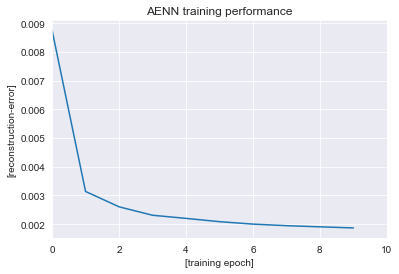

In [119]:
# plot the training progress
plt.plot(range(0, len(epoch_losses)), epoch_losses)
plt.xlabel('[training epoch]')
plt.xlim([0, len(epoch_losses)])
plt.ylabel('[reconstruction-error]')
#plt.ylim([0.0, 1.0])
plt.title('AENN training performance')

In [120]:
print(epoch_losses)

[0.008756218519953507, 0.003138434715226657, 0.002603719488570322, 0.002309298721425804, 0.0022002712127082527, 0.0020857419604804342, 0.0020003487020534673, 0.001945757458349477, 0.00190577295621852, 0.0018679969004261917]


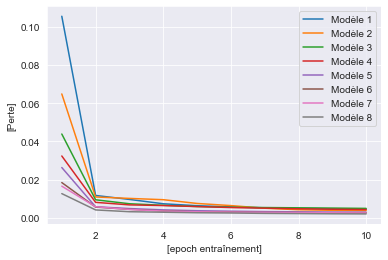

In [123]:
# Figure des différents types d'achitectures
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
mod_1 = [0.10555412630763271, 0.011645021309569934, 0.00956489732661759, 0.007293374660984114, 0.006272917473847346, 0.005650174351026734, 0.005169081751259202, 0.004860325455249903, 0.004651414180550174, 0.004496512979465324]
mod_2 = [0.06483820224719102, 0.010840371948857033, 0.010097326617590082, 0.009427469972878728, 0.007454010073614877, 0.006336923672994963, 0.004957535838822163, 0.004159899263851221, 0.0038633475397132893, 0.003703022084463386]
mod_3 = [0.04384041069352964, 0.009377876791941108, 0.007300891127469972, 0.006489267725687719, 0.005844168926772569, 0.005478922898101511, 0.005312088337853545, 0.0051688880278961645, 0.005031654397520341, 0.004866602092212321]
mod_4 = [0.032329484695854324, 0.008037156141030607, 0.0067007748934521496, 0.006354784967067029, 0.005826888802789616, 0.005307981402557148, 0.004996667958155753, 0.004664703603254551, 0.004426307632700503, 0.004254629988376599]
mod_5 = [0.026280085238279738, 0.005708291359938009, 0.0047802402169701665, 0.004098062766369624, 0.0036562185199535066, 0.0034022084463386287, 0.0031931034482758623, 0.0030588531576908177, 0.0029600542425416505, 0.0029032545524990314]
mod_6 = [0.018396474234792716, 0.005564858581944982, 0.00438283611003487, 0.003533165439752034, 0.003107090275087176, 0.0029294459511817125, 0.002743432777993026, 0.0026771018984889576, 0.0025331654397520342, 0.002532661759008136]
mod_7 = [0.016516582719876015, 0.005724719101123596, 0.004326346377373111, 0.003454746222394421, 0.0030849283223556762, 0.0028905075552111584, 0.002765943432777993, 0.0026476559473072453, 0.002552654010073615, 0.0024860131731886865]
mod_8 = [0.012606896551724136, 0.00405943432777993, 0.0031286710577295624, 0.0028602867105772954, 0.0025878341728012397, 0.0024481983727237503, 0.0022471135218907396, 0.002145098798915149, 0.002036923672994963, 0.0019721813250678033]
mod_9 = [0.008756218519953507, 0.003138434715226657, 0.002603719488570322, 0.002309298721425804, 0.0022002712127082527, 0.0020857419604804342, 0.0020003487020534673, 0.001945757458349477, 0.00190577295621852, 0.0018679969004261917]
plt.plot(x, mod_1, label='Modèle 1')
plt.plot(x, mod_2, label='Modèle 2')
plt.plot(x, mod_3, label='Modèle 3')
plt.plot(x, mod_4, label='Modèle 4')
plt.plot(x, mod_5, label='Modèle 5')
plt.plot(x, mod_6, label='Modèle 6')
plt.plot(x, mod_7, label='Modèle 7')
plt.plot(x, mod_8, label='Modèle 8')
plt.xlabel('[epoch entraînement]')
plt.ylabel('[Perte]')
plt.legend(loc="upper right")
plt.show()


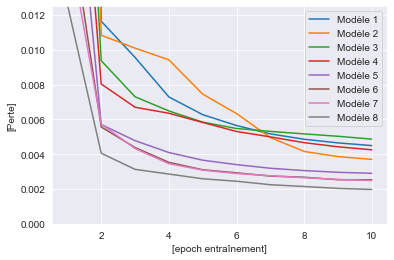

In [125]:
# Figure des différents types d'achitectures avec un zoom sur l'axe des Y
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
mod_1 = [0.10555412630763271, 0.011645021309569934, 0.00956489732661759, 0.007293374660984114, 0.006272917473847346, 0.005650174351026734, 0.005169081751259202, 0.004860325455249903, 0.004651414180550174, 0.004496512979465324]
mod_2 = [0.06483820224719102, 0.010840371948857033, 0.010097326617590082, 0.009427469972878728, 0.007454010073614877, 0.006336923672994963, 0.004957535838822163, 0.004159899263851221, 0.0038633475397132893, 0.003703022084463386]
mod_3 = [0.04384041069352964, 0.009377876791941108, 0.007300891127469972, 0.006489267725687719, 0.005844168926772569, 0.005478922898101511, 0.005312088337853545, 0.0051688880278961645, 0.005031654397520341, 0.004866602092212321]
mod_4 = [0.032329484695854324, 0.008037156141030607, 0.0067007748934521496, 0.006354784967067029, 0.005826888802789616, 0.005307981402557148, 0.004996667958155753, 0.004664703603254551, 0.004426307632700503, 0.004254629988376599]
mod_5 = [0.026280085238279738, 0.005708291359938009, 0.0047802402169701665, 0.004098062766369624, 0.0036562185199535066, 0.0034022084463386287, 0.0031931034482758623, 0.0030588531576908177, 0.0029600542425416505, 0.0029032545524990314]
mod_6 = [0.018396474234792716, 0.005564858581944982, 0.00438283611003487, 0.003533165439752034, 0.003107090275087176, 0.0029294459511817125, 0.002743432777993026, 0.0026771018984889576, 0.0025331654397520342, 0.002532661759008136]
mod_7 = [0.016516582719876015, 0.005724719101123596, 0.004326346377373111, 0.003454746222394421, 0.0030849283223556762, 0.0028905075552111584, 0.002765943432777993, 0.0026476559473072453, 0.002552654010073615, 0.0024860131731886865]
mod_8 = [0.012606896551724136, 0.00405943432777993, 0.0031286710577295624, 0.0028602867105772954, 0.0025878341728012397, 0.0024481983727237503, 0.0022471135218907396, 0.002145098798915149, 0.002036923672994963, 0.0019721813250678033]
mod_9 = [0.008756218519953507, 0.003138434715226657, 0.002603719488570322, 0.002309298721425804, 0.0022002712127082527, 0.0020857419604804342, 0.0020003487020534673, 0.001945757458349477, 0.00190577295621852, 0.0018679969004261917]
plt.plot(x, mod_1, label='Modèle 1')
plt.plot(x, mod_2, label='Modèle 2')
plt.plot(x, mod_3, label='Modèle 3')
plt.plot(x, mod_4, label='Modèle 4')
plt.plot(x, mod_5, label='Modèle 5')
plt.plot(x, mod_6, label='Modèle 6')
plt.plot(x, mod_7, label='Modèle 7')
plt.plot(x, mod_8, label='Modèle 8')
plt.xlabel('[epoch entraînement]')
plt.ylabel('[Perte]')
plt.ylim([0.0, 0.0125])
plt.legend(loc="upper right")
plt.show()

In [ ]:
# Figure du réseau 8 avec différentes probabilités de drop out

In [18]:
# restore pretrained model checkpoint
encoder_model_name = 'https://raw.githubusercontent.com/GitiHubi/deepAI/master/models/ep_10_encoder_model.pth'
decoder_model_name = 'https://raw.githubusercontent.com/GitiHubi/deepAI/master/models/ep_10_decoder_model.pth'

# Read stored model from the remote location
encoder_bytes = urllib.request.urlopen(encoder_model_name)
decoder_bytes = urllib.request.urlopen(decoder_model_name)

# Load tensor from io.BytesIO object
encoder_buffer = io.BytesIO(encoder_bytes.read())
decoder_buffer = io.BytesIO(decoder_bytes.read())

# init training network classes / architectures
encoder_eval = encoder()
decoder_eval = decoder()

# load trained models
encoder_eval.load_state_dict(torch.load(encoder_buffer))
decoder_eval.load_state_dict(torch.load(decoder_buffer))



<All keys matched successfully>

In [0]:
# convert encoded transactional data to torch Variable
data = autograd.Variable(torch_dataset)

# set networks in evaluation mode (don't apply dropout)
encoder_eval.eval()
decoder_eval.eval()

# reconstruct encoded transactional data
reconstruction = decoder_eval(encoder_eval(data))

In [20]:
# init binary cross entropy errors
reconstruction_loss_transaction = np.zeros(reconstruction.size()[0])

# iterate over all detailed reconstructions
for i in range(0, reconstruction.size()[0]):

    # determine reconstruction loss - individual transactions
    reconstruction_loss_transaction[i] = loss_function(reconstruction[i], data[i]).item()

    if(i % 100000 == 0):

        ### print conversion summary
        now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
        print('[LOG {}] collected individual reconstruction loss of: {:06}/{:06} transactions'.format(now, i, reconstruction.size()[0]))

[LOG 20200415-20:07:22] collected individual reconstruction loss of: 000000/533009 transactions
[LOG 20200415-20:07:28] collected individual reconstruction loss of: 100000/533009 transactions
[LOG 20200415-20:07:34] collected individual reconstruction loss of: 200000/533009 transactions
[LOG 20200415-20:07:41] collected individual reconstruction loss of: 300000/533009 transactions
[LOG 20200415-20:07:47] collected individual reconstruction loss of: 400000/533009 transactions
[LOG 20200415-20:07:53] collected individual reconstruction loss of: 500000/533009 transactions


In [21]:
# append labels to original dataset
ori_dataset['label'] = label
reconstruction_loss_transaction = pd.DataFrame(reconstruction_loss_transaction)
pd.concat([ori_dataset, reconstruction_loss_transaction], axis = 1)

,BELNR,WAERS,BUKRS,KTOSL,PRCTR,BSCHL,HKONT,DMBTR,WRBTR,label,0
0,288203,C3,C31,C9,C92,A3,B1,280979.60,0.00,regular,0.002495
1,324441,C1,C18,C7,C76,A1,B2,129856.53,243343.00,regular,0.003347
2,133537,C1,C19,C2,C20,A1,B3,957463.97,3183838.41,regular,0.002340
3,331521,C4,C48,C9,C95,A2,B1,2681709.51,28778.00,regular,0.005973
4,375333,C5,C58,C1,C19,A3,B1,910514.49,346.00,regular,0.003494
...,...,...,...,...,...,...,...,...,...,...,...
533004,446818,C1,C18,C3,C32,A1,B2,2501589.15,0.00,regular,0.001352
533005,455564,C8,C80,C1,C11,A1,B1,390076.18,12065.45,regular,0.003329
533006,156896,C1,C10,C1,C19,A1,B1,192147.38,326823.09,regular,0.002931
533007,455245,C1,C14,C4,C40,A1,B3,870539.68,0.00,regular,0.001581
